In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import numpy as np # main library for numeric calculations
import pandas as pd # main library for data analysis
import matplotlib.pyplot as plt # main library for data plotting
import seaborn as sns # Another library for data plotting with more functions
from matplotlib import rcParams

rcParams["figure.dpi"] = 150
rcParams["figure.figsize"] = (16.0, 8.0)

import scipy as scp # STEM software
from scipy import signal
import scipy.interpolate as interpolate

from glob import glob # check files
from IPython.display import display, Markdown

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import lightkurve as lk
import astropy

import wotan
from transitleastsquares import transitleastsquares as tls

import sys, os, pathlib

file_path = os.getcwd()
print(file_path)
parent_dir = "\\".join(file_path.split("\\")[:-1])
print(parent_dir)

sys.path.append(parent_dir)


"""
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)"""

import warnings
warnings.filterwarnings('ignore') # literally to ignore all the warnings that don't matter


def printf(*args, sep=" ", end="\n"):
    string = sep.join([str(i) for i in args])+end
    display(Markdown(string))



from lightkurve.lightcurve import KeplerLightCurve
import os
from typing import Union, List, Callable, Any

class LightCurve:
    def __init__(self, klc, kplrId):
        self.klc = klc
        self.id = kplrId

    def __enter__(self):
        return self
    
    def __repr__(self):
        return self.klc.__repr__()
    
    def __str__(self):
        return self.klc.__str__()

    def delete(self):
        os.remove(self.klc.meta["FILENAME"])

    def __del__(self):
        self.delete()

    def __exit__(self):
        self.__del__()

    def __getattr__(self, item):
        return eval(f"self.klc.{item}")


def retrieveKeplerLightCurve(kplrId, quarter=4):
    """
    :param kplrId: The Kepler Id, as an Integer, String or Float
    :returns: A KeplerLightCurve object
    """
    #kplrId = int(kplrId)
    search_result: lk.SearchResult = lk.search_lightcurve(kplrId, author="Kepler", cadence="long", quarter=quarter)
    #lk.search_lightcurve(f'KIC {kplrId}', mission='Kepler', cadence="long", quarter=4)
    klc: KeplerLightCurve = search_result.download_all().stitch().remove_outliers()
    return LightCurve(klc, kplrId)


def analyseKeplerLightCurve(kplrId, func):
    """
    :param kplrId: The Kepler Id, as an Integer, String or Float
    :param func: The function to be ran, with the modified KeplerLightCurve as a parameter
    :return: Result of func
    """
    with retrieveKeplerLightCurve(kplrId) as klc:
        return func(klc)

def plotKeplerLightCurve(klc):
    """
    :param klc: The LightCurve object
    :returns: The axes upon which the data has been plotted
    """
    ax = klc.plot()
    ax.set_title(f"Light curve of KIC {klc.id}")
    return ax


def plotKeplerSAPLightCurve(klc):
    """
    :param klc: The LightCurve object
    :returns: The axes upon which the data has been plotted
    """
    ax = klc.plot(column='sap_flux', normalize=True)
    ax.set_title(f"SAP Flux Light curve of KIC {klc.id}")
    return ax


def plotKeplerPDCSAPLightCurve(klc):
    """
    :param klc: The LightCurve object
    :returns: The axes upon which the data has been plotted
    """
    ax = klc.plot(column='pdcsap_flux', normalize=True)
    ax.set_title(f"PDCSAP Flux Light curve of KIC {klc.id}")
    return ax


C:\Users\Prannaya\ThreeBody\signal
C:\Users\Prannaya\ThreeBody


In [13]:
adobe = pd.read_csv("../sim/logs/adobe/adobe-21112021-2227.csv")
adobe

,lightcurve_x,lightcurve_y
0,0.985833,1.0
1,1.000000,1.0
2,1.000000,1.0
3,1.000000,1.0
4,1.000000,1.0
...,...,...
1547,1.000000,1.0
1548,1.000000,1.0
1549,1.000000,1.0
1550,1.000000,1.0


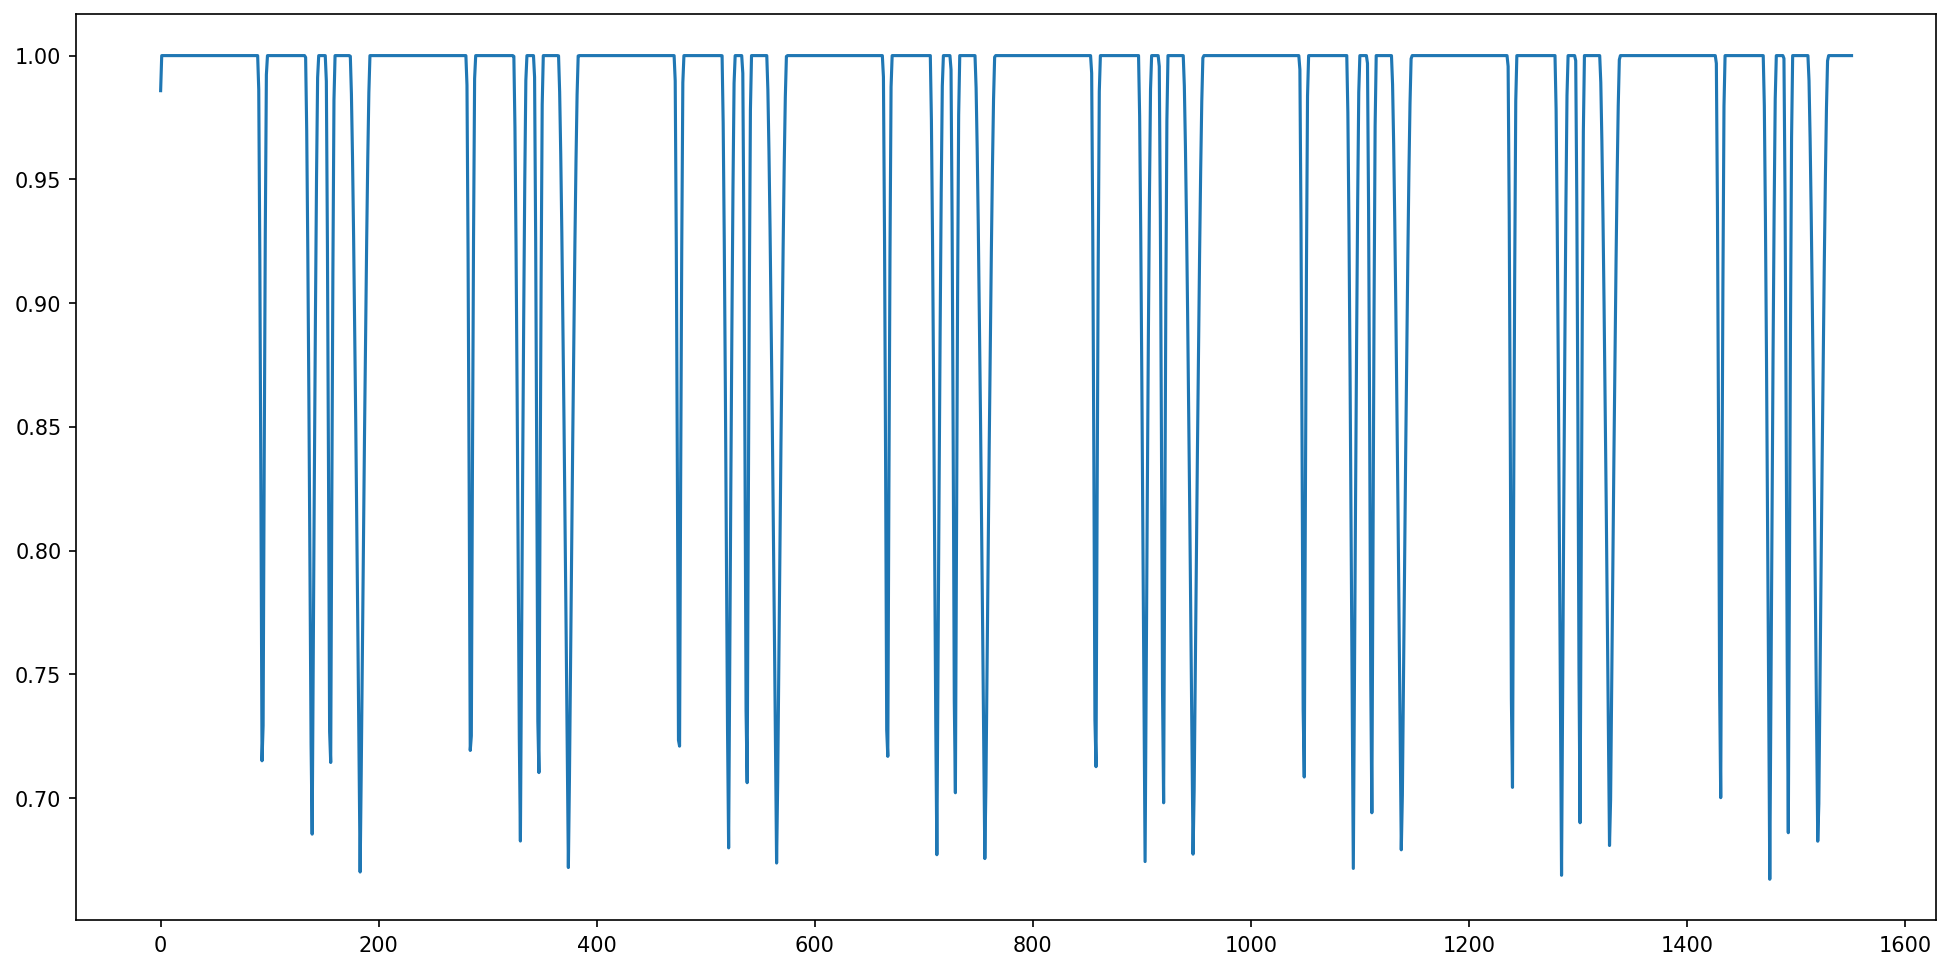

In [19]:
plt.plot(adobe.lightcurve_x)

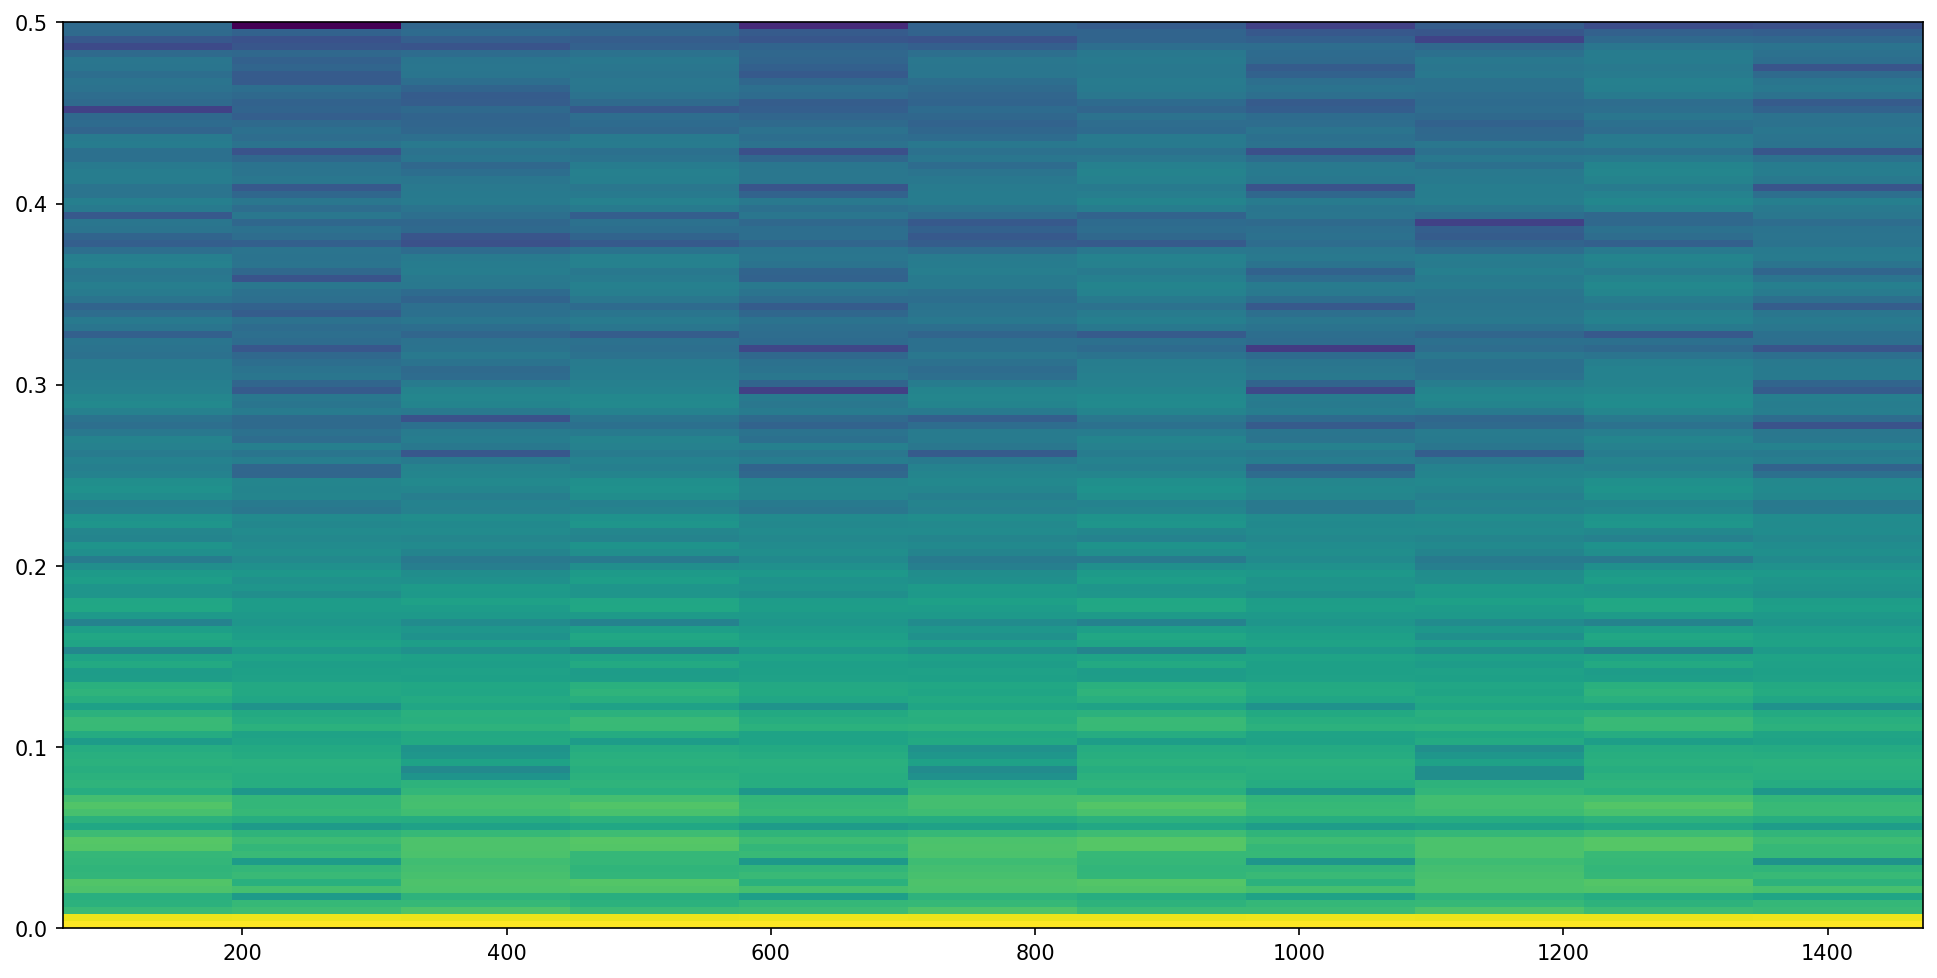

In [20]:
Pxx, freqs, bins, im = plt.specgram(adobe.lightcurve_x, Fs=1)

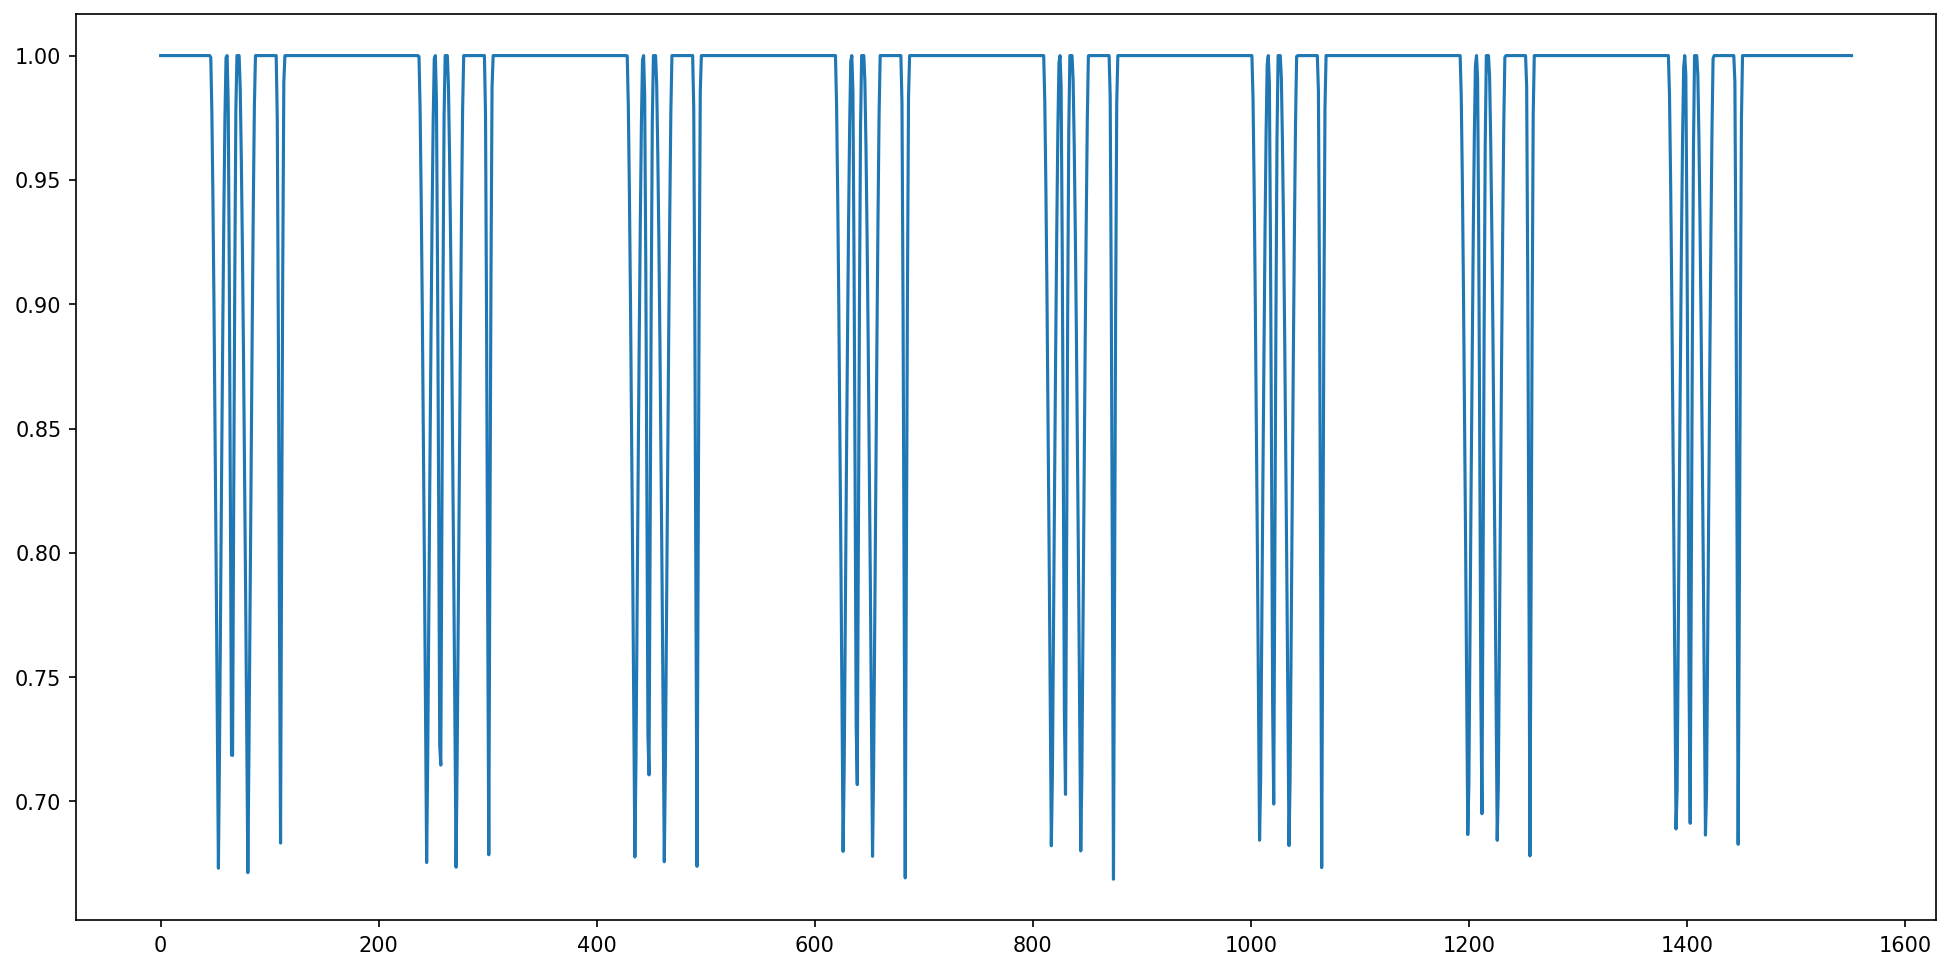

In [21]:
plt.plot(adobe.lightcurve_y)

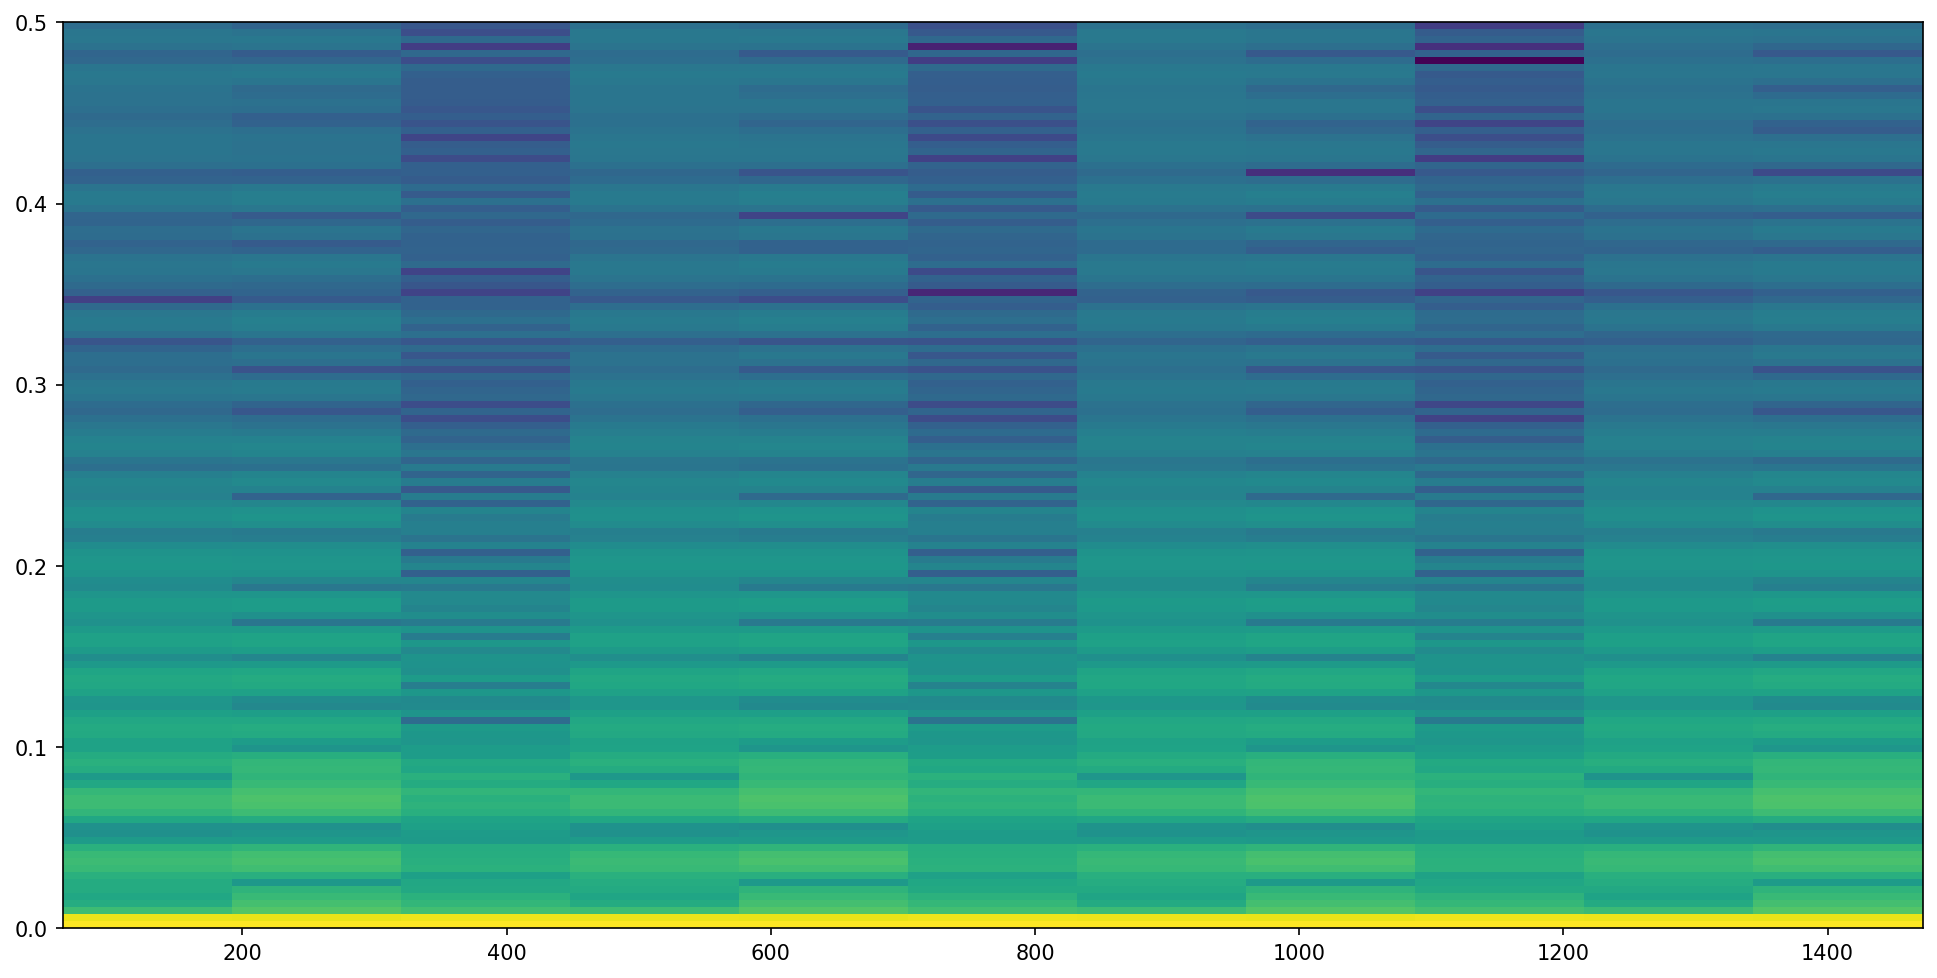

In [22]:
Pxx, freqs, bins, im = plt.specgram(adobe.lightcurve_y, Fs=1)

In [25]:
flatten_lc, trend_lc = wotan.flatten(adobe.index, adobe.lightcurve_x, window_length=256, method='biweight', return_trend=True)

In [26]:
adobe.loc[:, "trendX"] = trend_lc
adobe.loc[:, "flattenedX"] = flatten_lc
adobe

,lightcurve_x,lightcurve_y,trendX,flattenedX
0,0.985833,1.0,1.0,0.985833
1,1.000000,1.0,1.0,1.000000
2,1.000000,1.0,1.0,1.000000
3,1.000000,1.0,1.0,1.000000
4,1.000000,1.0,1.0,1.000000
...,...,...,...,...
1547,1.000000,1.0,1.0,1.000000
1548,1.000000,1.0,1.0,1.000000
1549,1.000000,1.0,1.0,1.000000
1550,1.000000,1.0,1.0,1.000000


<AxesSubplot:>

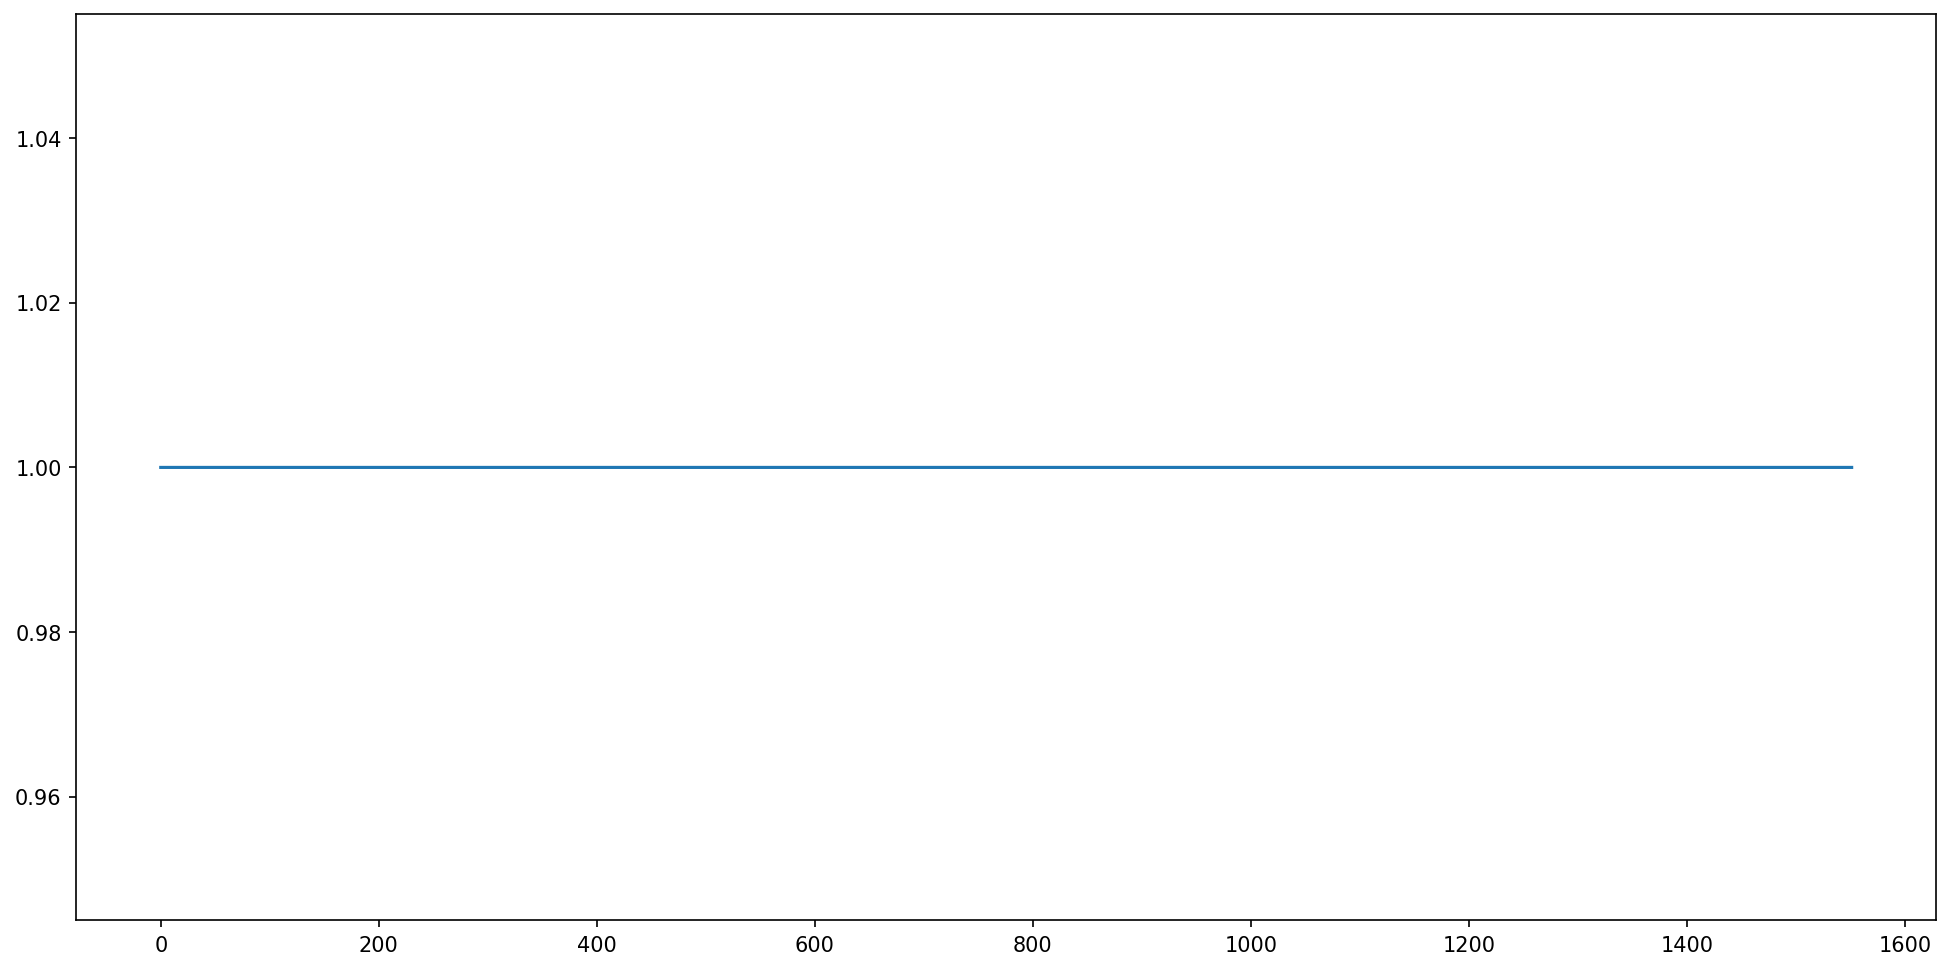

In [28]:
adobe.trendX.plot()